# Problem Statement 
#            - FORECASTING TO OPTIMIZE SOLAR POWER GENERATION
## A solar power generation company wants to optimize solar power production and needs the prediction model to predict ‘Clearsky DHI’, ‘Clearsky DNI’, ‘Clearsky GHI’. The data is ten years at an interval of every 30 mins with the following data points:


#### 0)   Year                    :    Years from 2009 to 2018  
#### 1)   Month                 :    ranges from 1 to 12 months from the given list of years 
#### 2)   Day                     :    31 days from the 12 months of each year  
#### 3)   Hour                   :    24 hours from every day of month in given year 
#### 4)   Minute                :    the values are recorded for every 30 minutes of a hour
#### 5)   Clearsky DHI     :    The amount of radiation from the sky 
#### 6)   Clearsky DNI     :    The amount of radiation reflected from the particles in the atmosphere  
#### 7)   Clearsky GHI     :    The amount radiation reflected from the parallen surface of the ground  
#### 8)   Cloud Type        :    The different types of clouds ranging from 0 to 9
#### 9)   Dew Point          :    The temperature the air needs to be cooled in order to achieve a relative Humidity
####  10)  Temperature   :     The degree of Hotness in the atmosphere
####  11)  Pressure         :  The force exerted on a surface by the air above it as gravity pulls it to Earth  
####  12)  Relative Humidity  :The amount of water present in the atmosphere
####  13)  Solar Zenith Angle: The angle between the Sun's rays and the vertical direction
####  14)  Precipitable Water: The depth of water column in the atmosphere
####  15)  Wind Direction  :   The direction of flow of wind
####  16)  Wind Speed   :      The rate at which the wind flows
####  17)  Fill Flag    :          A flag value 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading dataset
df_train = pd.read_csv("train.csv")

## Data Preprocessing

In [3]:
df_train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [4]:
# columns in the data
df_train.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [ ]:
# From the above info we infer that all the columns are numerical values 
# There is no categorical values in the given data

In [6]:
df_train.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


In [7]:
df_train.duplicated().sum()

0

In [8]:
df_train.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [9]:
# count of unique values in each column
df_train.nunique()

Year                     10
Month                    12
Day                      31
Hour                     24
Minute                    2
Clearsky DHI            375
Clearsky DNI           1032
Clearsky GHI           1053
Cloud Type               10
Dew Point               399
Temperature             436
Pressure                 50
Relative Humidity      7923
Solar Zenith Angle    16222
Precipitable Water     6267
Wind Direction         3601
Wind Speed              117
Fill Flag                31
dtype: int64

# EDA

In [92]:
#categorizing the temperatures into high,low,medium
high = [25,40]
low = [-9, 10]
medium = [10, 25]

In [11]:
def temp_range(i):
    if i >= high[0] and i <= high[1]:
        return'[25,40]'
    elif i >= low[0] and i <= low[1]:
        return '[-9, 10]'
    return '[10, 25]' 

In [12]:
df_train['temp'] = df_train['Temperature'].apply(lambda x: temp_range(x))

In [13]:
df_train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,temp
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,"[-9, 10]"
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,"[-9, 10]"
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,"[-9, 10]"
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,"[-9, 10]"
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,"[-9, 10]"


In [14]:
# Creating 4 seasons to check their effect on dependent columns
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df_train['Season'] = df_train['Month'].apply(lambda x: season_dict[x])

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


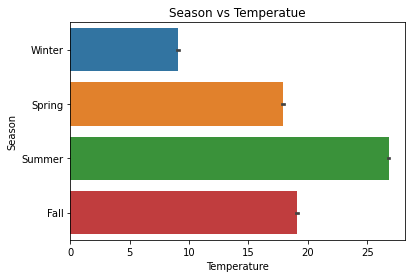

In [15]:
# As we created a season column to check whether the seasons are assigned correctly we plotted a plot between temp vs season
# Asusual summer has high temperature
sns.barplot(df_train['Temperature'], df_train['Season'])
plt.title('Season vs Temperatue')
plt.show()

In [16]:
# clearly, summer has higher temperature than remaining seasons

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


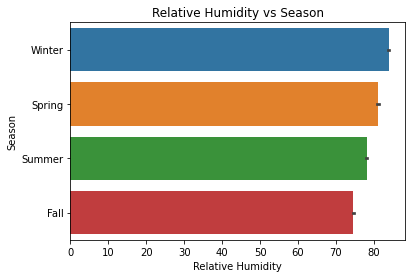

In [17]:
sns.barplot(df_train['Relative Humidity'], df_train['Season'])
plt.title('Relative Humidity vs Season')
plt.show()

In [18]:
# there is not much difference in humidity among seasons but in winter there is a little high

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


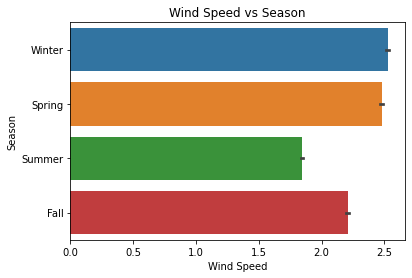

In [19]:
sns.barplot(df_train['Wind Speed'], df_train['Season'])
plt.title('Wind Speed vs Season')
plt.show()

In [20]:
# Wind speed is almost same in winter and spring (higher than remaining 2 seasons)

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


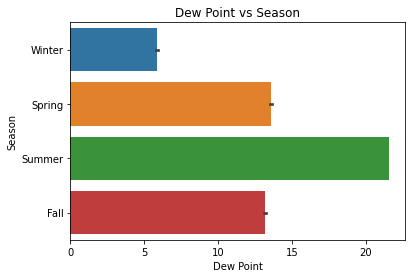

In [21]:
sns.barplot(df_train['Dew Point'], df_train['Season'])
plt.title('Dew Point vs Season')
plt.show()

In [22]:
# Dew point is higher in summer

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


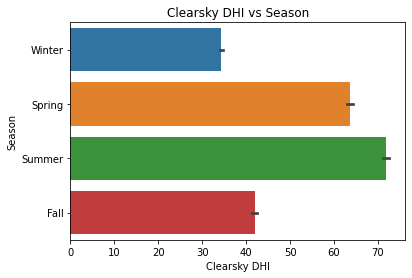

In [23]:
sns.barplot(df_train['Clearsky DHI'], df_train['Season'])
plt.title('Clearsky DHI vs Season')
plt.show()

In [24]:
# Clearsky DHI value is higher in summer than remaining seasons
# Hence we can estimate that Clearsky sky value increases with the increase in temperatures

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


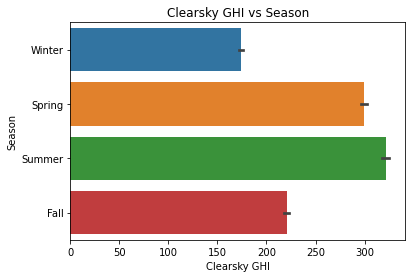

In [25]:
sns.barplot(df_train['Clearsky GHI'], df_train['Season'])
plt.title('Clearsky GHI vs Season')
plt.show()

In [26]:
# Clearsky GHI is higher in Summer
# Even Clearsky GHI values also increases with the increase in temperature

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


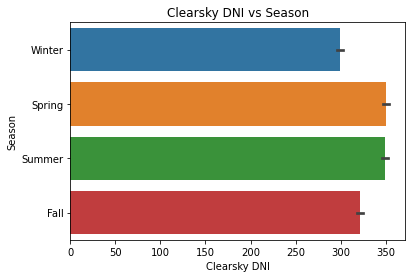

In [27]:
sns.barplot(df_train['Clearsky DNI'], df_train['Season'])
plt.title('Clearsky DNI vs Season')
plt.show()

In [28]:
# Clearsky DNI is almost same in spring and summer
# so at moderate temperatures the Clearsky DNI also yields a good value

In [118]:
# df_train['Season'] = df_train['Month'].apply(lambda x: season_dict[x])
# df_train[["Season","Clearsky DHI"]].groupby("Season").agg("sum").plot(marker = 'o',figsize = (10,5),color = "darkblue")
# plt.title("How total Clearsky DHI is changing wrt Seasons: ",color = 'purple',size = 10)

# df_train[["Season","Clearsky DNI"]].groupby("Season").agg("sum").plot(marker = 'o',figsize = (10,5),color = 'r')
# plt.title("How total Clearsky DNI is changing wrt Seasons: ",color = 'purple',size = 10)


# df_train[["Season","Clearsky GHI"]].groupby("Season").agg("sum").plot(marker = 'o',figsize = (10,5),color = 'brown')
# plt.title("How total Clearsky GHI is changing wrt Seasons: ",color = 'purple',size = 10)
# plt.show()

In [30]:
high = [25,40]
low = [-9, 10]
medium = [10, 25]

In [31]:
# changing temperature column in to a range
def temp_range(i):
    if i >= high[0] and i <= high[1]:
        return'[25,40]'
    elif i >= low[0] and i <= low[1]:
        return '[-9, 10]'
    return '[10, 25]' 

In [32]:
df_train['temp'] = df_train['Temperature'].apply(lambda x: temp_range(x))

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


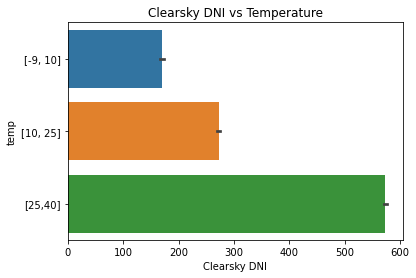

In [33]:
sns.barplot(df_train['Clearsky DNI'], df_train['temp'])
plt.title('Clearsky DNI vs Temperature')
plt.show()

In [34]:
# Clearsky DNI value is higher when temperature is high

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


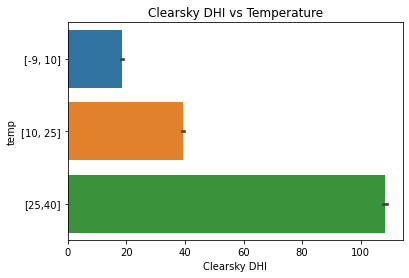

In [35]:
sns.barplot(df_train['Clearsky DHI'], df_train['temp'])
plt.title('Clearsky DHI vs Temperature')
plt.show()

In [36]:
# Clearsky DHI value is higher when temperature is high

In [37]:
# exploring the relation of other variables with temperature

In [38]:
# variation of Clearsky GHI with respect to temperatures

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


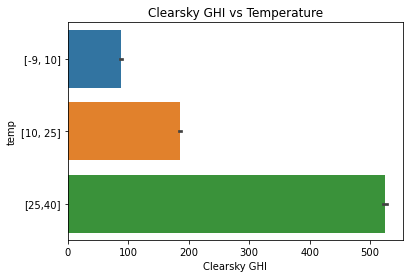

In [39]:
sns.barplot(df_train['Clearsky GHI'], df_train['temp'])
plt.title('Clearsky GHI vs Temperature')
plt.show()

In [40]:
# From the plot we can depict that the Clearsky values are high mostly in the temperature range of [25,40]
# Clearsky GHI value is higher when temperature is high

In [41]:
# predicting the variation of Relative Humidity with respect to Temperature

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


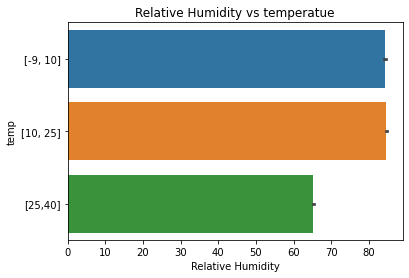

In [42]:
sns.barplot(df_train['Relative Humidity'], df_train['temp'])
plt.title('Relative Humidity vs temperatue')
plt.show()

In [43]:
# Relative Humidity is maximum with temperature ranges of [-9,10] and [10,25]

# Tracing Outliers

In [44]:
# deploying the outliers in every column of the dataset using the Boxplots

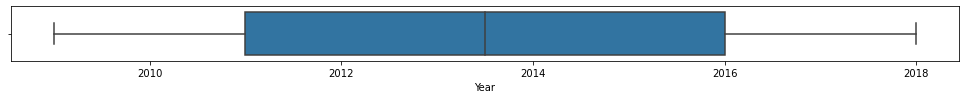

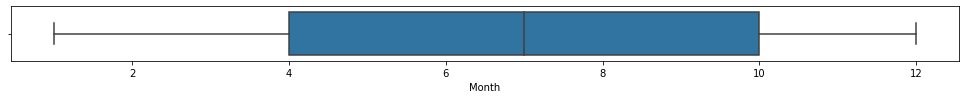

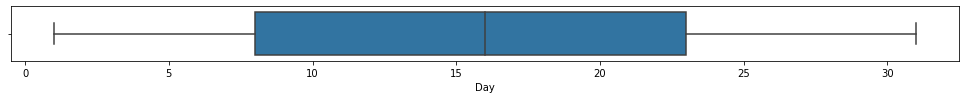

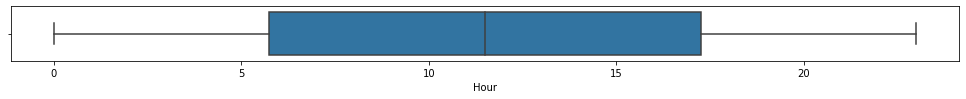

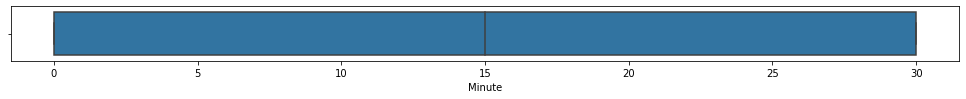

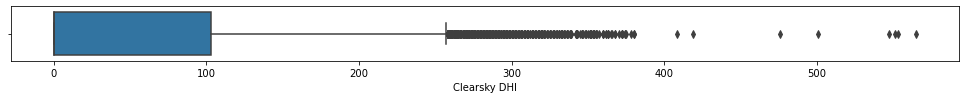

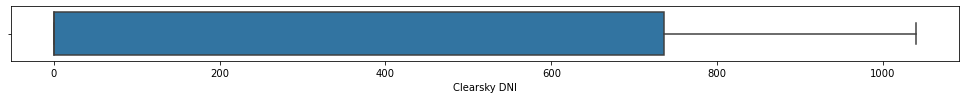

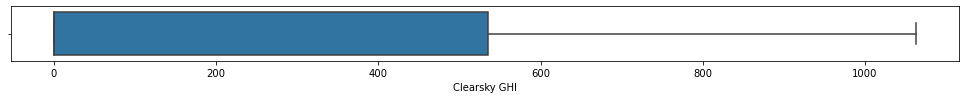

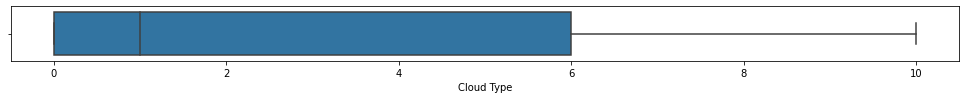

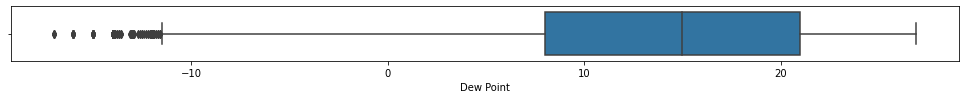

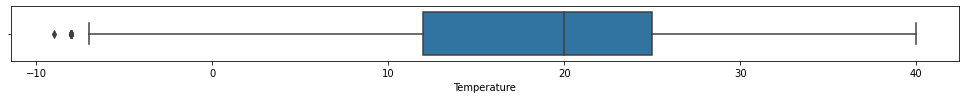

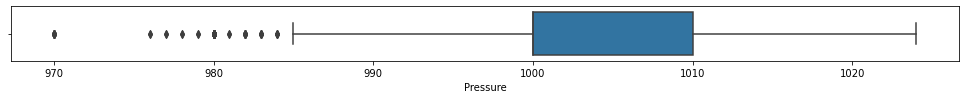

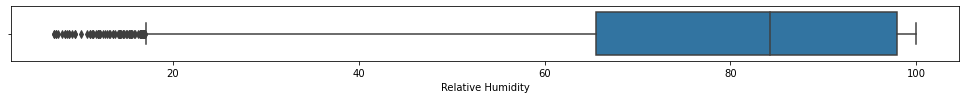

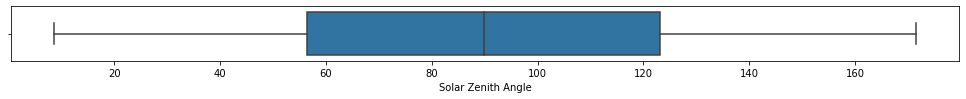

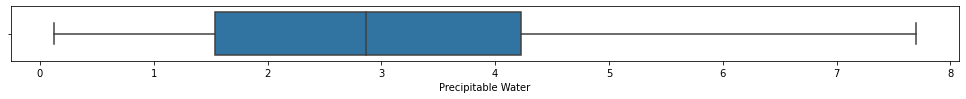

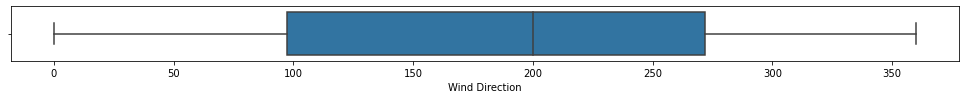

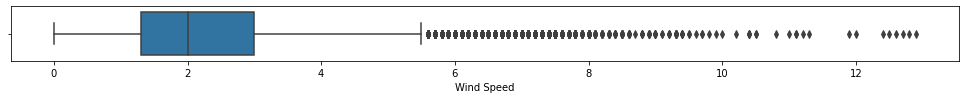

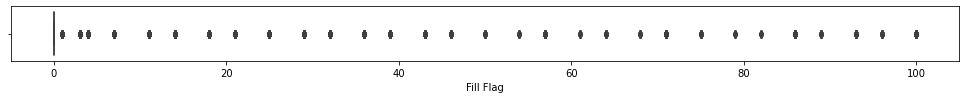

In [45]:
df1=df_train.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [46]:
# handling outiers
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR))| (df_train > (Q3 + 1.5 * IQR))). any(axis=1)]

C:\Users\Kalyani\AppData\Local\Temp/ipykernel_17940/3081181231.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_train = df_train[~((df_train < (Q1 - 1.5 * IQR))| (df_train > (Q3 + 1.5 * IQR))). any(axis=1)]


In [47]:
df_train.shape

(160021, 20)

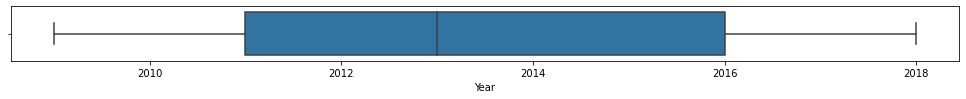

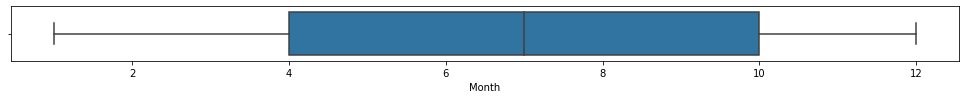

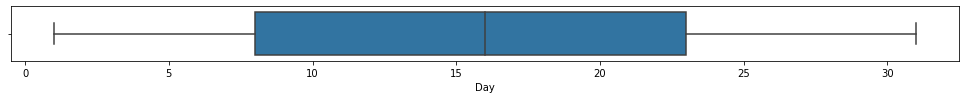

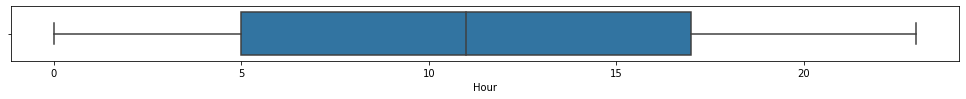

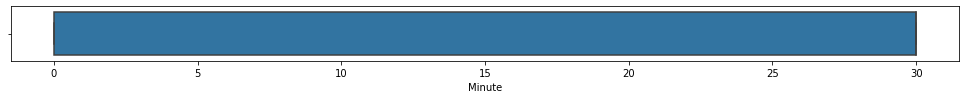

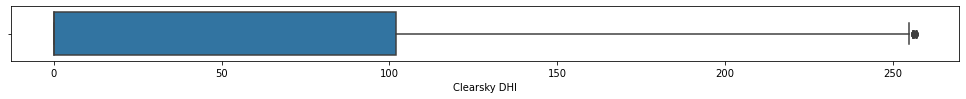

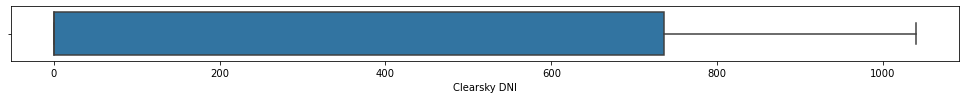

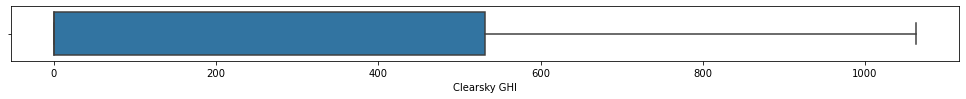

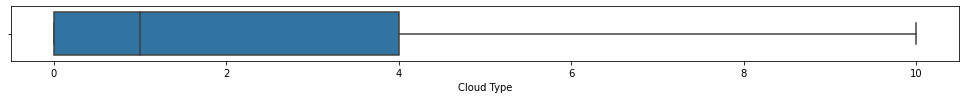

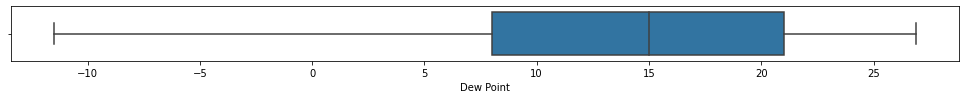

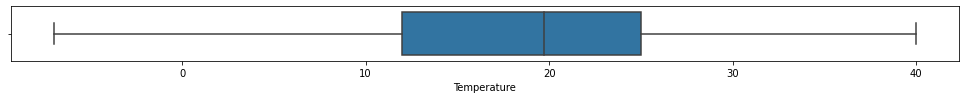

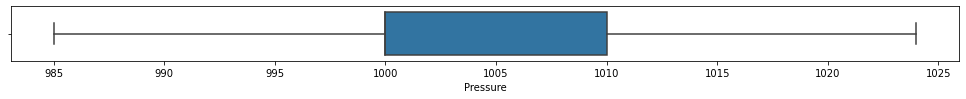

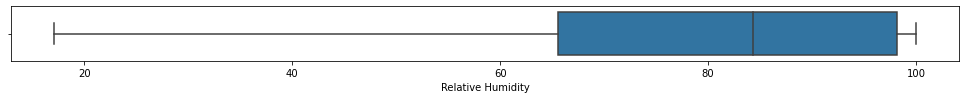

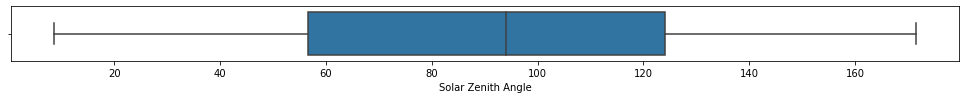

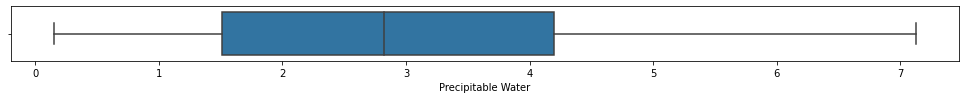

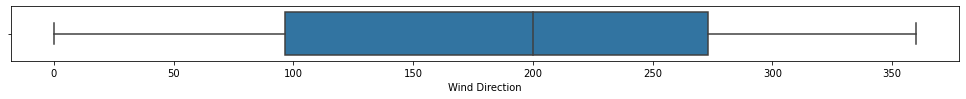

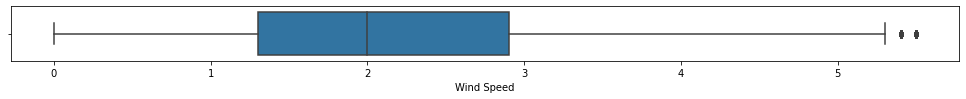

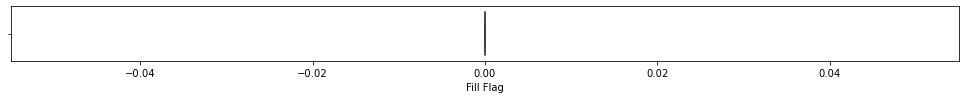

In [48]:
df1=df_train.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [49]:
# after clearing the outliers we observe that the column 'FLAG FILL' doesnot contain any required data so we conclude of removing the column
# Removing Fill Flag Column
df_train.drop(columns = ['Fill Flag'], inplace = True)

In [50]:
# dimensions of the dataset after clearing the FILL FLAG colomn
df_train.shape

(160021, 19)

# HeatMap

<AxesSubplot:>

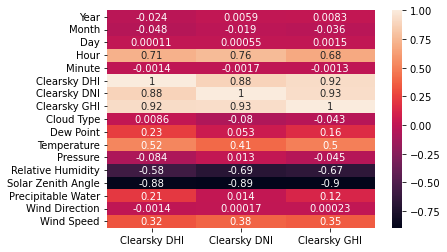

In [51]:
sns.heatmap(df_train.corr()[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']], annot = True)

# Spliting the data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df_train.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI','Season','temp'],axis = 1)
Y1 = df_train['Clearsky DHI']
Y2 = df_train['Clearsky DNI']
Y3= df_train['Clearsky GHI']

In [54]:
X.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed
0,2009,1,1,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1
1,2009,1,1,0,30,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1
2,2009,1,1,1,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2
3,2009,1,1,1,30,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1
4,2009,1,1,2,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0


# Model preparation

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y1_train, Y1_test = train_test_split( X, Y1, test_size=0.3, random_state=0)
X_train, X_test, Y2_train, Y2_test = train_test_split( X, Y2, test_size=0.3, random_state=0)
X_train, X_test, Y3_train, Y3_test = train_test_split( X, Y3, test_size=0.3, random_state=0)

In [56]:
# we here considered a single input  training data and 3 output variable datasets for predicting the values of
# 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI' 
# even for predicting the best fit model for the data 
# we tried of 4 models like XGBRegressor,RandomForestRegressor,LGBMRegressor,LinearRegressions

In [60]:
pip install xgboost

In [59]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [57]:
# the function is defined to calculate the evaluation metrics mean square error  and regression score of a model
def model_eval(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    return mse,model.score(X_train,y_train)

In [58]:
def test_params(**params):
    model = XGBRegressor(n_jobs = -1, random_state = 12, **params)
    print("            Mean Square Error  Regression Score")
    print()
    print("DHI_MSE :",model_eval(model,X_train,X_test,Y1_train,Y1_test))
    print("DNI_MSE :",model_eval(model,X_train,X_test,Y2_train,Y2_test))
    print("GHI_MSE :",model_eval(model,X_train,X_test,Y2_train,Y2_test))

In [61]:
test_params()

            Mean Square Error  Regression Score

DHI_MSE : (123.26647603964905, 0.9771954289800956)
DNI_MSE : (854.3272825771749, 0.9953326425496862)
GHI_MSE : (854.3272825771749, 0.9953326425496862)


In [62]:
def test_params(**params):
    model = RandomForestRegressor(n_jobs = -1, random_state = 12, **params)
    print("            Mean Square Error  Regression Score")
    print()
    print("DHI_MSE :",model_eval(model,X_train,X_test,Y1_train,Y1_test))
    print("DNI_MSE :",model_eval(model,X_train,X_test,Y2_train,Y2_test))
    print("GHI_MSE :",model_eval(model,X_train,X_test,Y3_train,Y3_test))

In [63]:
test_params()

            Mean Square Error  Regression Score

DHI_MSE : (99.5630942070948, 0.9965099870761348)
DNI_MSE : (976.6959897202491, 0.999022735223253)
GHI_MSE : (35.96605958714354, 0.9999541341265398)


In [64]:
def test_params(**params):
    model = LGBMRegressor(n_jobs = -1, random_state = 12, **params)
    print("            Mean Square Error  Regression Score")
    print()
    print("DHI_MSE :",model_eval(model,X_train,X_test,Y1_train,Y1_test))
    print("DNI_MSE :",model_eval(model,X_train,X_test,Y2_train,Y2_test))
    print("GHI_MSE :",model_eval(model,X_train,X_test,Y3_train,Y3_test))

In [65]:
test_params()

            Mean Square Error  Regression Score

DHI_MSE : (141.52994932136102, 0.9681068503882009)
DNI_MSE : (958.4032435161257, 0.9937108457350057)
GHI_MSE : (34.08543568200253, 0.9997143562813716)


In [66]:
def test_params(**params):
    model = LinearRegression(n_jobs = -1, **params)
    print("DHI_MSE :",model_eval(model,X_train,X_test,Y1_train,Y1_test))
    print("DNI_MSE :",model_eval(model,X_train,X_test,Y2_train,Y2_test))
    print("GHI_MSE :",model_eval(model,X_train,X_test,Y3_train,Y3_test))

In [67]:
test_params()

DHI_MSE : (797.823662584163, 0.8011873495640094)
DNI_MSE : (19910.13752664646, 0.8585473896809314)
GHI_MSE : (17815.826737161646, 0.8343661037259866)


In [68]:
df_test = pd.read_csv('test.csv')

In [69]:
df_test.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [70]:
df_test.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],axis = 1, inplace = True)

In [71]:
df_test.drop(columns=['Fill Flag'],axis = 1, inplace = True)

In [72]:
model1 = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators=4000,max_depth=10)
model1.fit(X_train,Y1_train)
model2 = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators=4000, max_depth=10)
model2.fit(X_train,Y2_train)
model3 = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators=4000, max_depth=10)
model3.fit(X_train,Y3_train)

RandomForestRegressor(max_depth=10, n_estimators=4000, n_jobs=-1,
                      random_state=42)

In [73]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [74]:
def predict(model, new_input):
    input_df = pd.DataFrame(new_input)
    input_cols = input_df.columns.tolist()
    input_df[input_cols] = scalar.fit_transform(input_df [input_cols])
    return model.predict(input_df)

In [75]:
pred_dhi = predict(model1, df_test)

In [76]:
pred_dhi

array([133.16186506, 118.36542314, 118.36542314, ..., 118.07639061,
       118.07639061, 118.07639061])

In [77]:
pred_dni = predict(model2, df_test)

In [78]:
pred_ghi = predict(model3, df_test)

In [79]:
pred_df = pd.DataFrame()

In [80]:
pred_df['Clearsky DHI'] = pred_dhi
pred_df['Clearsky DNI'] = pred_dni
pred_df['Clearsky GHI'] = pred_ghi

In [81]:
pred_df

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,133.161865,861.318084,1049.607762
1,118.365423,861.318084,1049.607762
2,118.365423,861.318084,1049.607762
3,118.363923,861.318084,1049.607762
4,118.365266,861.268005,1049.607762
...,...,...,...
17515,118.076391,864.694537,1049.607762
17516,118.076391,864.694537,1049.607762
17517,118.076391,864.694537,1049.607762
17518,118.076391,864.694537,1049.607762


In [82]:
df_train['Clearsky DHI'].value_counts()

0      85612
88       747
90       730
86       719
84       711
       ...  
253       15
249       15
255       13
257       10
1         10
Name: Clearsky DHI, Length: 258, dtype: int64

In [119]:
def mse(y_test, y_pred):
    mse = mean_squared_error(y_test,y_pred)
    return mse

In [84]:

new_input = {
    'Year':[2010],
    'Month':[2],
    'Day':[14],
    'Hour':[17],
    'Minute':[30],
    'Cloud Type':[0],
    'Dew Point':[4.0],
    'Temperature':[10.0],
    'Pressure':[1000],
    'Relative Humidity':[67.25],
    'Solar Zenith Angle':[44.97],
    'Precipitable Water':[1.053],
    'Wind Direction':[246.7],
    'Wind Speed':[2.8],
    
}

In [85]:
df_train.iloc[17515]

Year                      2010
Month                        2
Day                         14
Hour                        17
Minute                      30
Clearsky DHI               115
Clearsky DNI               913
Clearsky GHI               761
Cloud Type                   0
Dew Point                  4.0
Temperature               10.0
Pressure                  1000
Relative Humidity        67.25
Solar Zenith Angle       44.97
Precipitable Water       1.053
Wind Direction           246.7
Wind Speed                 2.8
temp                  [-9, 10]
Season                  Winter
Name: 19667, dtype: object

In [86]:
def predict(model, new_input):
    input_df = pd.DataFrame(new_input)
    input_cols = input_df.columns.tolist()
    input_df[input_cols] = scalar.fit_transform(input_df [input_cols])
    return model.predict(input_df)

In [87]:
print("DHI = ",predict(model1,new_input)) #  Actual = 115
print("DNI = ",predict(model2,new_input)) # 
Actual = 913
print("GHI = ",predict(model3,new_input)) # Actual = 761

DHI =  [118.07639061]
DNI =  [864.69453687]
GHI =  [1049.60776238]


In [88]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score
print('max error value :',max_error(Y1_test[1:10000],Y1_train[1:10000]))
print('mean absolute error value :',mean_absolute_error(Y1_test[1:10000],Y1_train[1:10000]))
print("r2 score :" ,r2_score(Y1_test[1:10000],Y1_train[1:10000]))

max error value : 256
mean absolute error value : 65.57325732573257
r2 score : -0.9690122518428732


In [89]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score
print('max error value :',max_error(Y2_test[1:10000],Y2_train[1:10000]))
print('mean absolute error value :',mean_absolute_error(Y2_test[1:10000],Y2_train[1:10000]))
print("r2 score :" ,r2_score(Y2_test[1:10000],Y2_train[1:10000]))

max error value : 1016
mean absolute error value : 387.8523852385239
r2 score : -0.9703724390031891


In [90]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score
print('max error value :',max_error(Y3_test[1:10000],Y3_train[1:10000]))
print('mean absolute error value :',mean_absolute_error(Y3_test[1:10000],Y3_train[1:10000]))
print("r2 score :" ,r2_score(Y3_test[1:10000],Y3_train[1:10000]))

max error value : 1055
mean absolute error value : 335.3343334333433
r2 score : -0.9695220683366665


# Business Recommendations

#### As Solar Zenith angle is the angle between the Sun's rays and the vertical direction.
#### From the graph we infer that the solar zenith angle is higher in winter so if we make that correct 
#### angle corresponding to the season then we can achieve higher optimization of solar energy 

<AxesSubplot:xlabel='Season', ylabel='Solar Zenith Angle'>

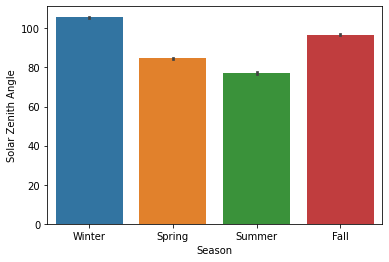

In [104]:
sns.barplot('Season','Solar Zenith Angle',data = df_train)

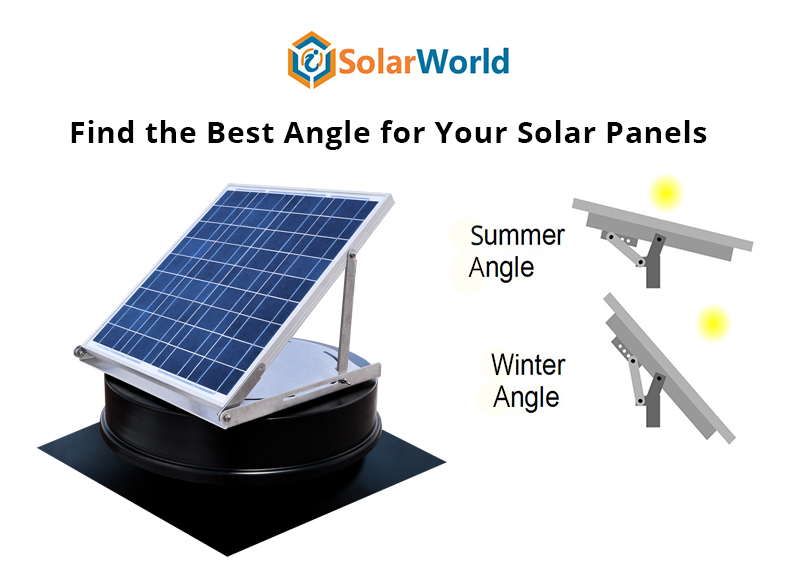

In [111]:
from IPython.display import Image
Image(filename='panel.jpg',width=800, height=200)

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Wind Direction'>

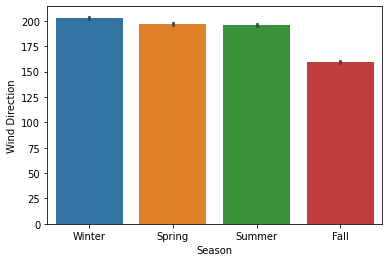

In [114]:
sns.barplot('Season','Wind Direction',data = df_train)

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Pressure'>

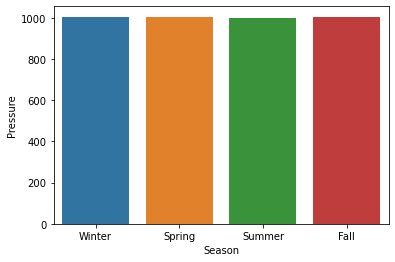

In [115]:
sns.barplot('Season','Pressure',data = df_train)

C:\Users\Kalyani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Wind Speed'>

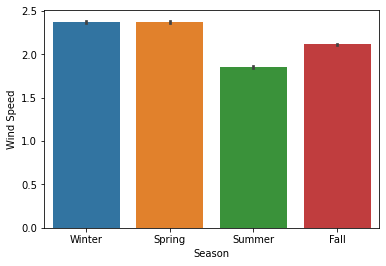

In [116]:
sns.barplot('Season','Wind Speed',data = df_train)

#### from the graph we infer that the wind speed is comparitively higher in winter and spring among all seasons
#### so at seasons we need to place the panels in the direction opposite to direction of wind flow